In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Optional: For machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
# Step 2: Load CSV Files
portfolio_df = pd.read_csv('Client_Portfolio_DeutscheBank.csv', encoding='latin1')
sector_df = pd.read_csv('Market_Sector_DeutscheBank.csv', encoding='latin1')
model_df = pd.read_csv('AI_Models_DeutscheBank.csv', encoding='latin1')

In [5]:
# Step 3: Basic Exploration
print(portfolio_df.head())
print(sector_df.head())
print(model_df.head())

  Client ID    Client Name Client Type Investment Type       Sector  \
0      C001   Maria Schulz  Individual          Stocks   Technology   
1      C002   Markus Weber   Corporate           Bonds      Finance   
2      C003    Anita Meier  Individual    Mutual Funds   Healthcare   
3      C004  Thomas Krüger  Individual            ETFs  Real Estate   
4      C005  Sarah Fischer   Corporate          Stocks      Finance   

    Asset Class         Region  Country  Investment Amount ($)  Return (%)  \
0        Equity         Europe  Germany                 120000        12.5   
1  Fixed Income  North America      USA                 500000        10.3   
2        Equity         Europe  Austria                  85000         9.1   
3        Equity           Asia    Japan                  60000         7.2   
4        Equity         Europe  Germany                 750000        13.4   

  Risk Category  AI Risk Score (0-100)  Predicted Return (%)  
0        Medium                     82   

In [6]:
# Step 4: Merge Files (if needed)
# Example: Merge portfolio with model outputs on 'Client ID'
merged_df = pd.merge(portfolio_df, model_df, on='Client ID', how='left')

In [8]:
# Step 5: Data Cleaning
# Check for nulls, convert datatypes
print(merged_df.isnull().sum())
merged_df['Investment Amount ($)'] = merged_df['Investment Amount ($)'].astype(str).str.replace(',', '').astype(float)

Client ID                 0
Client Name               0
Client Type               0
Investment Type           0
Sector                    0
Asset Class               0
Region                    0
Country                   0
Investment Amount ($)     0
Return (%)                0
Risk Category             0
AI Risk Score (0-100)     0
Predicted Return (%)_x    0
Model Used                0
Predicted Return (%)_y    0
Confidence (%)            0
High Risk Flag            0
Comments                  0
dtype: int64


In [11]:
# Step 6: EDA - Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='Risk Category', y='Predicted Return (%)_x')
plt.title('Predicted Return by Risk Category')
plt.show()

In [10]:
print(merged_df.columns)

Index(['Client ID', 'Client Name', 'Client Type', 'Investment Type', 'Sector',
       'Asset Class', 'Region', 'Country', 'Investment Amount ($)',
       'Return (%)', 'Risk Category', 'AI Risk Score (0-100)',
       'Predicted Return (%)_x', 'Model Used', 'Predicted Return (%)_y',
       'Confidence (%)', 'High Risk Flag', 'Comments'],
      dtype='object')


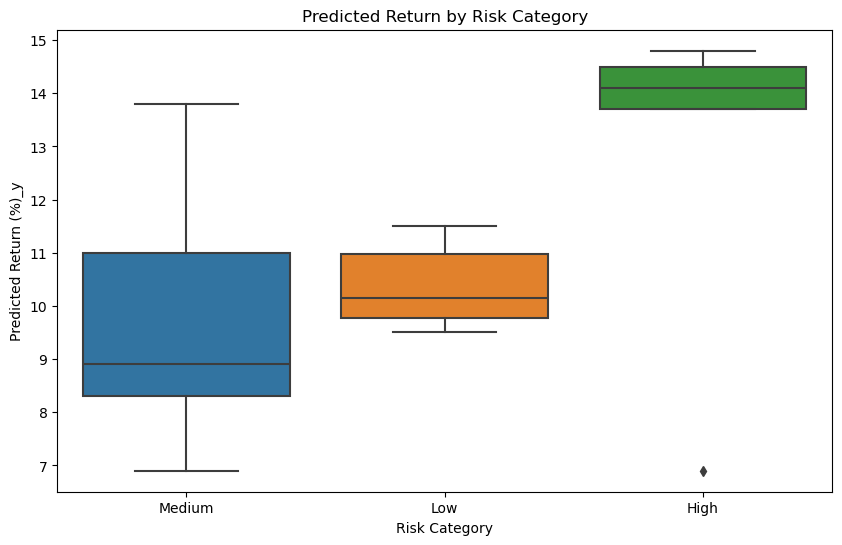

In [12]:
# Step 6: EDA - Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='Risk Category', y='Predicted Return (%)_y')
plt.title('Predicted Return by Risk Category')
plt.show()

In [13]:
# Example: Sector-wise Investment
sector_investment = merged_df.groupby('Sector')['Investment Amount ($)'].sum().sort_values(ascending=False)
sector_investment.plot(kind='barh', title='Total Investment by Sector', figsize=(10,6))
plt.xlabel('Total Investment ($)')
plt.show()

In [14]:
# Step 7: Machine Learning (Optional)
# Predict returns based on sector and risk
le = LabelEncoder()
merged_df['Sector_encoded'] = le.fit_transform(merged_df['Sector'])

In [16]:
print(merged_df.columns.tolist())

['Client ID', 'Client Name', 'Client Type', 'Investment Type', 'Sector', 'Asset Class', 'Region', 'Country', 'Investment Amount ($)', 'Return (%)', 'Risk Category', 'AI Risk Score (0-100)', 'Predicted Return (%)_x', 'Model Used', 'Predicted Return (%)_y', 'Confidence (%)', 'High Risk Flag', 'Comments', 'Sector_encoded']


In [19]:
# Strip spaces and remove non-breaking/invisible characters
merged_df.columns = merged_df.columns.str.strip().str.replace('\u200e', '').str.replace('\uFEFF', '')

In [21]:
X = merged_df[['Sector_encoded', 'AI Risk Score (0-100)']]
y = merged_df['Predicted Return (%)_y']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("Model score:", model.score(X_test, y_test))

Model score: 0.9315956631124944


In [23]:
# Step 8: Export Cleaned File (for Power BI)
merged_df.to_csv('DeutscheBank_Final.csv', index=False)